In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
import os
import sys
import time
import smbus

from imusensor.MPU9250 import MPU9250

address = 0x68
bus = smbus.SMBus(1)
imu = MPU9250.MPU9250(bus, address)
imu.begin()

x = []
y = []
z = []

time1 = time.time()
while True:
    imu.readRawSensor()
    
    # print ("Mag x: {0} ; Mag y : {1} ; Mag z : {2}".format(imu.MagVals[0], imu.MagVals[1], imu.MagVals[2]))
    time.sleep(0.1)
    time2=time.time()
    x.append(imu.RawMagVals[0])
    y.append(imu.RawMagVals[1])
    z.append(imu.RawMagVals[2])
    if time2-time1>30:
        break

The name is wrong [113]


In [25]:
magnetic = pd.DataFrame()
magnetic['x'] = x
magnetic['y'] = y
magnetic['z'] = z

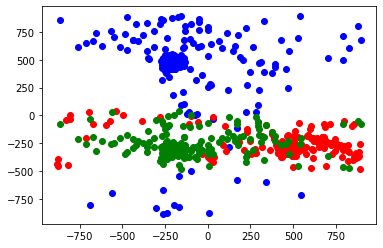

In [26]:
plt.scatter(magnetic['x'], magnetic['y'], c='blue')
plt.scatter(magnetic['y'], magnetic['z'], c='red')
plt.scatter(magnetic['x'], magnetic['z'], c='green')

In [27]:
x = magnetic['x']
y = magnetic['y']
z = magnetic['z']

avg_delta_x = (max(x) - min(x)) / 2
avg_delta_y = (max(y) - min(y)) / 2
avg_delta_z = (max(z) - min(z)) / 2

In [28]:
avg_delta = (avg_delta_x + avg_delta_y + avg_delta_z) / 3

scale_x = avg_delta / avg_delta_x
scale_y = avg_delta / avg_delta_y
scale_z = avg_delta / avg_delta_z

In [29]:
magnetic['xs'] = magnetic['x']*scale_x
magnetic['ys'] = magnetic['y']*scale_y
magnetic['zs'] = magnetic['z']*scale_z

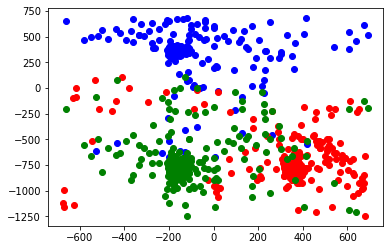

In [30]:
plt.scatter(magnetic['xs'], magnetic['ys'], c='blue')
plt.scatter(magnetic['ys'], magnetic['zs'], c='red')
plt.scatter(magnetic['xs'], magnetic['zs'], c='green')

In [31]:
offset_x = magnetic['x'].max() + magnetic['x'].min() / 2
offset_y = magnetic['y'].max() + magnetic['y'].min() / 2
offset_z = magnetic['z'].max() + magnetic['z'].min() / 2
magnetic['calibrated_x'] = magnetic['x'] - offset_x
magnetic['calibrated_y'] = magnetic['y'] - offset_y
magnetic['calibrated_z'] = magnetic['z'] - offset_z

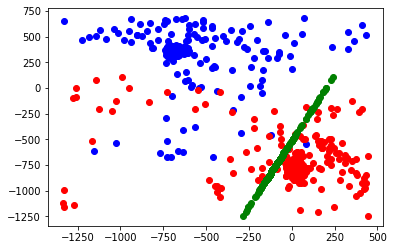

In [32]:
plt.scatter(magnetic['calibrated_x'], magnetic['ys'], c='blue')
plt.scatter(magnetic['calibrated_y'], magnetic['zs'], c='red')
plt.scatter(magnetic['calibrated_z'], magnetic['zs'], c='green')